LIBRARIES AND PACKAGES IMPORTS

In [2]:
import pandas as pd
import numpy as np
from pgmpy.models import BayesianModel
from pgmpy.models import BayesianNetwork
from pgmpy.estimators import ExpectationMaximization
from pgmpy.inference import VariableElimination
import matplotlib.pyplot as plt
import networkx as nx
import re 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix,precision_recall_curve
from sklearn.model_selection import train_test_split
import seaborn as sns

In [ ]:

# Load the data from the CSV file into a pandas DataFrame
data = pd.read_csv(r"K:\STUDIES\----- M1 AI\S2\RC2\RC2-LAB\TP5\breast-cancer.csv")


In [ ]:

# Define the structure
model = BayesianNetwork([
    ('age', 'menopause'),
    ('menopause', 'node_caps'),
    ('node_caps', 'inv_nodes'),
    ('inv_nodes', 'tumor_size'),
    ('tumor_size', 'deg_malig'),
    ('tumor_size', 'irradiat'),
    ('deg_malig', 'irradiat')
])


CALLING THE #EM AND PLOTING THE FINAL GRAPH

In [ ]:

# Instantiate the ExpectationMaximization Estimator
estimator = ExpectationMaximization(model, data)

# Run the estimation
#estimator.fit()

# Create a directed graph from the model
graph = nx.DiGraph(model.edges())

# Plot the graph
plt.figure(figsize=(10, 6))
pos = nx.spring_layout(graph, seed=30)  # Set a random seed for consistent layout
nx.draw(graph, pos, with_labels=True, node_size=2000, node_color="skyblue", font_size=12, font_weight="bold", arrowsize=20)
plt.title("Bayesian Network Structure")
plt.show()


CPD values

In [ ]:

# Get the CPD values
cpd_values = estimator.get_parameters()

# Print the CPD values
for cpd in cpd_values:
    print("CPD for node:", cpd.variable)
    print(cpd)


#2ND STEP: SPLIT DATA AND DO .2 TRAINING

EM ALGORITHM IMPLEMENTATION WITH 0.2 FOR TESTING

In [3]:
# Load the data from the CSV file into a pandas DataFrame
data2 = pd.read_csv(r"K:\STUDIES\----- M1 AI\S2\RC2\RC2-LAB\TP5\breast-cancer.csv")

In [4]:
# Split the data into train and test sets (80% for train, 20% for test)
train_data, test_data = train_test_split(data2, test_size=0.2, random_state=42)

In [19]:

# Define the structure
model2 = BayesianNetwork([
    ('age', 'menopause'),
    ('menopause', 'node_caps'),
    ('node_caps', 'inv_nodes'),
    ('inv_nodes', 'tumor_size'),
    ('tumor_size', 'deg_malig'),
    ('tumor_size', 'irradiat'),
    ('deg_malig', 'irradiat')
])


In [6]:
data2

,Class,age,menopause,tumor_size,inv_nodes,node_caps,deg_malig,breast,breast_quad,irradiat
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no
...,...,...,...,...,...,...,...,...,...,...
281,recurrence-events,30-39,premeno,30-34,0-2,no,2,left,left_up,no
282,recurrence-events,30-39,premeno,20-24,0-2,no,3,left,left_up,yes
283,recurrence-events,60-69,ge40,20-24,0-2,no,1,right,left_up,no
284,recurrence-events,40-49,ge40,30-34,03-May,no,3,left,left_low,no


In [7]:
train_data

,Class,age,menopause,tumor_size,inv_nodes,node_caps,deg_malig,breast,breast_quad,irradiat
139,no-recurrence-events,40-49,premeno,30-34,0-2,no,2,left,right_low,no
25,no-recurrence-events,40-49,premeno,25-29,0-2,no,2,left,left_up,no
82,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_low,no
144,no-recurrence-events,60-69,ge40,45-49,06-Aug,yes,3,left,central,no
66,no-recurrence-events,40-49,premeno,25-29,0-2,no,1,right,right_low,no
...,...,...,...,...,...,...,...,...,...,...
188,no-recurrence-events,40-49,premeno,Oct-14,0-2,no,2,right,left_up,no
71,no-recurrence-events,40-49,premeno,25-29,0-2,no,2,right,left_up,no
106,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_up,no
270,recurrence-events,50-59,ge40,30-34,06-Aug,yes,3,left,right_low,no


In [8]:
test_data

,Class,age,menopause,tumor_size,inv_nodes,node_caps,deg_malig,breast,breast_quad,irradiat
9,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,left_up,no
267,recurrence-events,60-69,ge40,20-24,24-26,yes,3,left,left_low,yes
143,no-recurrence-events,40-49,premeno,45-49,0-2,no,2,left,left_low,yes
212,recurrence-events,40-49,premeno,30-34,0-2,no,3,right,right_up,no
227,recurrence-events,50-59,premeno,30-34,0-2,no,3,right,left_up,yes
155,no-recurrence-events,60-69,ge40,40-44,03-May,no,2,right,left_up,yes
283,recurrence-events,60-69,ge40,20-24,0-2,no,1,right,left_up,no
73,no-recurrence-events,50-59,premeno,15-19,0-2,no,2,right,right_low,no
196,no-recurrence-events,50-59,premeno,Oct-14,03-May,no,1,right,left_up,no
33,no-recurrence-events,50-59,ge40,Oct-14,0-2,no,1,right,left_up,no


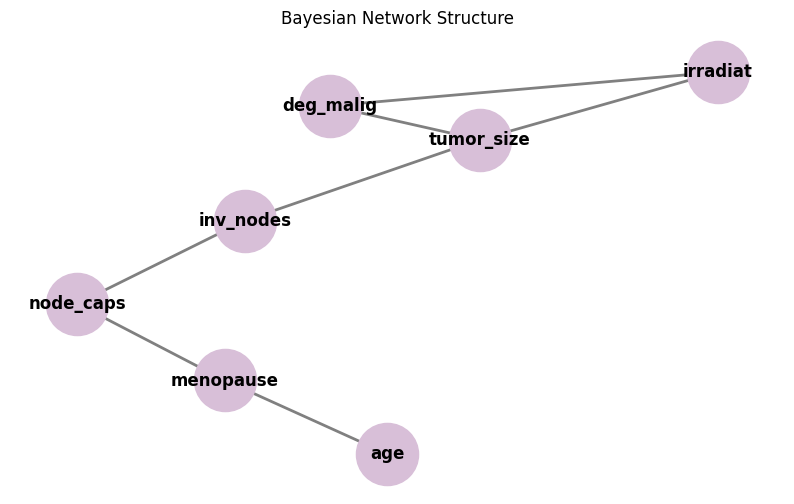

In [10]:

# Instantiate the ExpectationMaximization Estimator
estimator = ExpectationMaximization(model2, train_data)

# Run the estimation
#estimator.fit()

# Create a directed graph from the model
graph = nx.DiGraph(model2.edges())

# Plot the graph
plt.figure(figsize=(10, 6))
pos = nx.spring_layout(graph, seed=30)  # Set a random seed for consistent layout

# Draw nodes with pastel purple color
nx.draw_networkx_nodes(graph, pos, node_size=2000, node_color="#D8BFD8")  # Pastel purple color

# Draw edges with thicker arcs
nx.draw_networkx_edges(graph, pos, width=2, edge_color="grey",arrows=True,arrowsize=20)

# Draw labels
nx.draw_networkx_labels(graph, pos, font_size=12, font_weight="bold")

plt.title("Bayesian Network Structure")
plt.axis("off")  # Turn off axis
plt.show()


In [11]:
estimator.get_parameters()

  0%|          | 0/100 [00:00<?, ?it/s]

[<TabularCPD representing P(deg_malig:3 | tumor_size:11) at 0x1a26ffb9010>,
 <TabularCPD representing P(node_caps:3 | menopause:3) at 0x1a26ffbbe90>,
 <TabularCPD representing P(menopause:3 | age:5) at 0x1a2707cb810>,
 <TabularCPD representing P(age:5) at 0x1a270714d10>,
 <TabularCPD representing P(tumor_size:11 | inv_nodes:6) at 0x1a27075f090>,
 <TabularCPD representing P(inv_nodes:6 | node_caps:3) at 0x1a270769990>,
 <TabularCPD representing P(irradiat:2 | deg_malig:3, tumor_size:11) at 0x1a270751d90>]

In [23]:
# Run the estimation (estimate the model parameters)
cpds = estimator.get_parameters()

# Print the learned CPDs
for cpd in cpds:
    print(cpd)


  0%|          | 0/100 [00:00<?, ?it/s]

+--------------+-----+---------------------+
| tumor_size   | ... | tumor_size(Oct-14)  |
+--------------+-----+---------------------+
| deg_malig(1) | ... | 0.45454545454545453 |
+--------------+-----+---------------------+
| deg_malig(2) | ... | 0.45454545454545453 |
+--------------+-----+---------------------+
| deg_malig(3) | ... | 0.09090909090909091 |
+--------------+-----+---------------------+
+----------------+-----+----------------------+
| menopause      | ... | menopause(premeno)   |
+----------------+-----+----------------------+
| node_caps(?)   | ... | 0.008547008547008548 |
+----------------+-----+----------------------+
| node_caps(no)  | ... | 0.7692307692307693   |
+----------------+-----+----------------------+
| node_caps(yes) | ... | 0.2222222222222222   |
+----------------+-----+----------------------+
+--------------------+-----+------------+
| age                | ... | age(70-79) |
+--------------------+-----+------------+
| menopause(ge40)    | ... | 1.0     

In [24]:
test_data.columns

Index(['Class', 'age', 'menopause', 'tumor_size', 'inv_nodes', 'node_caps',
       'deg_malig', 'breast', 'breast_quad', 'irradiat'],
      dtype='object')

In [25]:

test_data.drop(columns=['Class','breast_quad' ,'breast'],inplace=True)
test_features = test_data.drop(columns=['irradiat'])
test_actual_values = test_data['irradiat']  


In [32]:
test_features.columns

Index(['age', 'menopause', 'tumor_size', 'inv_nodes', 'node_caps',
       'deg_malig'],
      dtype='object')

In [33]:

# Get the estimated parameters
cpds = estimator.get_parameters()

# Add the estimated parameters to the model
for cpd in cpds:
    model2.add_cpds(cpd)


# Make predictions on test data
predictions = []
test_actual_values = test_data['age', 'menopause', 'tumor_size', 'inv_nodes', 'node_caps','deg_malig','irradiat']  # Defining test_actual_values
for index, row in test_features.iterrows():
    row_df = pd.DataFrame([row], columns=test_features.columns)  # Convert dictionary to DataFrame with correct column names
    pd.DataFrame([row.drop('irradiat')], columns=row.index.drop('irradiat'))
    prediction = model2.predict(row_df)
    predictions.append(prediction[0]['irradiat'])


# Evaluate performance
accuracy = accuracy_score(test_actual_values, predictions)
print("Accuracy:", accuracy)

# Evaluate performance
accuracy = accuracy_score(test_actual_values, predictions)
print("Accuracy:", accuracy)

  0%|          | 0/100 [00:00<?, ?it/s]

KeyError: ('age', 'menopause', 'tumor_size', 'inv_nodes', 'node_caps', 'deg_malig', 'irradiat')